<a href="https://colab.research.google.com/github/NIKKISAHA/kerasProjects/blob/main/irisClassification/irisClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#necess-libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing data
data = pd.read_csv("/content/drive/MyDrive/iris.csv")

#two ways of changing atrribute name
data["sepal length"] = data["5.1"]
data["sepal width"] = data["3.5"]
data["petal length"] = data["1.4"]
data["petal width"]=data["0.2"]
data=data.drop(columns=["5.1","3.5","1.4","0.2"])

df=data
df.rename(columns={"Iris-setosa":'catagory'},inplace=True)
df

,catagory,sepal length,sepal width,petal length,petal width
0,Iris-setosa,4.9,3.0,1.4,0.2
1,Iris-setosa,4.7,3.2,1.3,0.2
2,Iris-setosa,4.6,3.1,1.5,0.2
3,Iris-setosa,5.0,3.6,1.4,0.2
4,Iris-setosa,5.4,3.9,1.7,0.4
...,...,...,...,...,...
144,Iris-virginica,6.7,3.0,5.2,2.3
145,Iris-virginica,6.3,2.5,5.0,1.9
146,Iris-virginica,6.5,3.0,5.2,2.0
147,Iris-virginica,6.2,3.4,5.4,2.3


In [ ]:
#viewing data
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   catagory      149 non-null    object 
 1   sepal length  149 non-null    float64
 2   sepal width   149 non-null    float64
 3   petal length  149 non-null    float64
 4   petal width   149 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
#diving into x  and y
x=df[["sepal length","sepal width","petal length","petal width"]]
df['catagory'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
y=df[['catagory']]
y
y['catagory'].unique()
y.value_counts()
# Iris-setosa,Iris-versicolor,Iris-virginica

catagory
1           50
2           50
0           49
dtype: int64

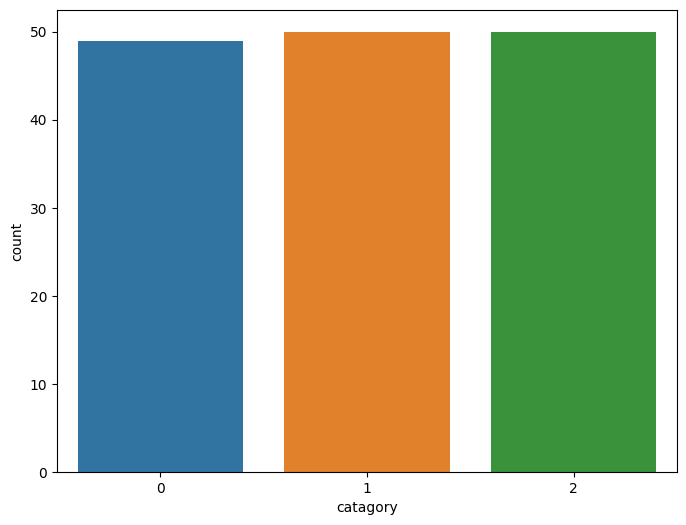

In [ ]:
#vizualizing
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='catagory')
plt.xlabel='catagory'
plt.ylabel='count'
plt.show()

In [ ]:
# spliting into 4
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(119, 4)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

x_test_scaled

array([[ 0.71096698, -0.3117199 ,  0.31382661,  0.13887608],
       [-0.86930015,  1.73645194, -1.29489689, -1.2047218 ],
       [ 2.29123411, -0.99444384,  1.8076413 ,  1.48247397],
       [-0.13994609, -0.99444384, -0.14580867, -0.26420328],
       [ 1.07564401, -0.08414525,  0.71600749,  0.67631524],
       [-0.74774114,  2.41917588, -1.29489689, -1.47344137],
       [ 1.07564401,  0.1434294 ,  0.37128103,  0.27323587],
       [ 1.31876203,  0.1434294 ,  0.7734619 ,  1.48247397],
       [-0.2615051 , -1.22201849,  0.08400897, -0.12984349],
       [ 0.22473094, -0.76686919,  0.7734619 ,  0.54195545],
       [ 0.83252599,  0.37100405,  0.7734619 ,  1.0793946 ],
       [-1.84177222, -0.08414525, -1.52471454, -1.47344137],
       [-1.11241817,  0.1434294 , -1.29489689, -1.47344137],
       [-0.50462312,  1.50887729, -1.29489689, -1.33908159],
       [-0.50462312,  0.82615334, -1.17998807, -1.33908159],
       [-1.11241817, -1.44959314, -0.2607175 , -0.26420328],
       [ 0.71096698,  0.

***ML Starts here***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [ ]:
model=keras.Sequential()
model.add(Dense(10,input_dim=4,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                50        
                                                                 
 dense_40 (Dense)            (None, 7)                 77        
                                                                 
 dense_41 (Dense)            (None, 3)                 24        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test), epochs=40)

Epoch 1/40
4/4 [==============================] - 0s 75ms/step - loss: 0.6636 - accuracy: 0.7815 - val_loss: 0.6454 - val_accuracy: 0.8000
Epoch 2/40
4/4 [==============================] - 0s 35ms/step - loss: 0.6507 - accuracy: 0.7899 - val_loss: 0.6333 - val_accuracy: 0.8000
Epoch 3/40
4/4 [==============================] - 0s 50ms/step - loss: 0.6382 - accuracy: 0.8067 - val_loss: 0.6216 - val_accuracy: 0.8000
Epoch 4/40
4/4 [==============================] - 0s 27ms/step - loss: 0.6264 - accuracy: 0.8067 - val_loss: 0.6101 - val_accuracy: 0.8000
Epoch 5/40
4/4 [==============================] - 0s 42ms/step - loss: 0.6148 - accuracy: 0.8067 - val_loss: 0.5990 - val_accuracy: 0.8000
Epoch 6/40
4/4 [==============================] - 0s 34ms/step - loss: 0.6029 - accuracy: 0.8067 - val_loss: 0.5890 - val_accuracy: 0.8000
Epoch 7/40
4/4 [==============================] - 0s 35ms/step - loss: 0.5925 - accuracy: 0.8151 - val_loss: 0.5796 - val_accuracy: 0.8000
Epoch 8/40
4/4 [===========

In [ ]:
test_loss,test_accuracy=model.evaluate(x_test_scaled,y_test)
print("my",test_loss,test_accuracy,)

1/1 [==============================] - 0s 39ms/step - loss: 0.3653 - accuracy: 0.8667
my 0.3653324246406555 0.8666666746139526


In [ ]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test_scaled,verbose=0)

rounded=np.argmax(prediction,axis=1)
# for i in rounded:
#   print(i)
print(classification_report(y_test,rounded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30

